In [107]:
#initialize packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [108]:
#change to directory
import os
os.chdir('C:\\Users\\trevo\\OneDrive - UNT System\\PhD\\Ta Actuator\\Sensors and Actuators A- Physical\\Data')
#open excel
flexheat = pd.read_excel('data_4_19_2023.xlsx',sheet_name="flexheat")
fan = pd.read_excel('data_4_19_2023.xlsx',sheet_name="fan")
nofan = pd.read_excel('data_4_19_2023.xlsx',sheet_name="nofan")



In [109]:
#process ideal data
ideal = [1,1.024,1.061,1.061,1.085,1.305,1.372,1.476,1.494, 1.366,1.335,1.189,1.134,1.116,1.110,1.079,1.061,1.043,0.971,0.982,0.975,0.994,1.037,1.171,1.299,1.372,1.415,1.476,1.555,1.500,1.488,1.415,1.396,1.341,1.305,1.049,1.000,1.000,0.994,1.000,1.061,1.122,1.140,1.299,1.329,1.341,1.421,1.482,1.506,1.524,1.640,1.634,1.616,1.518,1.512,1.494,1.421,1.427,1.311,1.201,1.091,1.037]
#process time data
time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 48, 53, 58, 63, 68, 73, 78, 83, 88, 107, 112, 117, 122, 127, 132, 137, 142, 147, 152, 159, 164, 169, 174, 179, 184, 189, 194, 199, 204, 221, 226, 231, 236, 241, 246, 251, 256, 261, 266, 271, 276, 286, 291, 296, 301, 306, 311, 316, 321, 326, 331, 336, 341]

In [110]:
#convert ideal to dataframe
ideal = pd.DataFrame(ideal)
time = pd.DataFrame(time)

In [111]:
#combine dataframes to be time and expansion
ideal = pd.concat([time,ideal],axis=1)

In [112]:
#rename columns to be time and expansion
ideal.columns = ['time','expansion']

In [113]:
#take flexheat total height and subtract sample height
flexheat['elongation (mm)'] = flexheat['Total height'] - flexheat['sample height']
fan['elongation (mm)'] = fan['enlongation']
nofan['elongation (mm)'] = nofan['total height'] - nofan['sample height']

In [114]:
#rename the three dataframes columns so Time is time (s), elongation is elongation (mm), and temperature is temperature (C)
flexheat = flexheat.rename(columns={'time':'time (s)'})
fan = fan.rename(columns={'Time':'time (s)','temp':'temperature (C)'})
nofan = nofan.rename(columns={'Time':'time (s)','temp':'temperature (C)'})
#reorder the three dataframes so they are time, elongation, and temperature
flexheat = flexheat[['time (s)','elongation (mm)']]
fan = fan[['time (s)','elongation (mm)','temperature (C)']]
nofan = nofan[['time (s)','elongation (mm)','temperature (C)']]

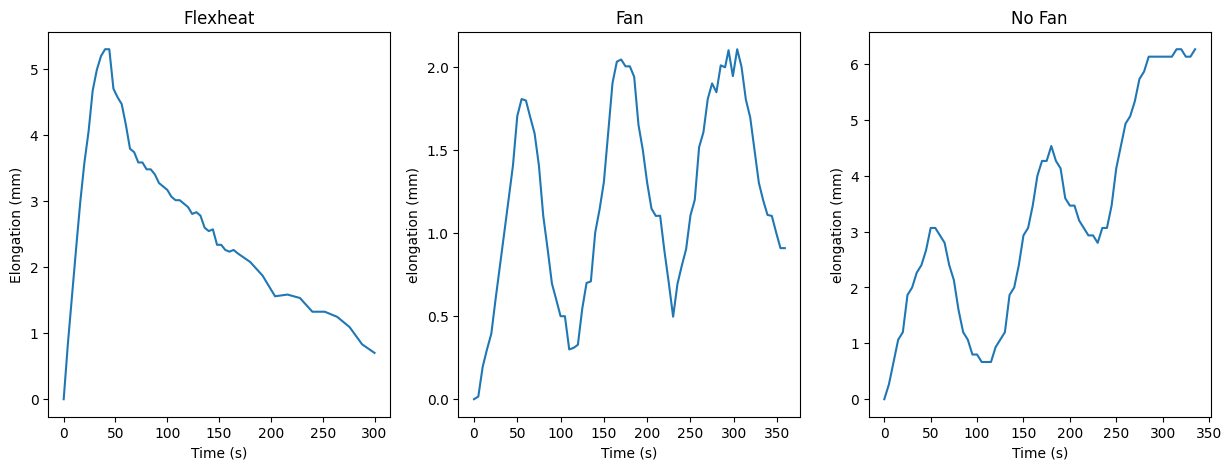

In [115]:
#plot the three dataframes
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.lineplot(x='time (s)',y='elongation (mm)',data=flexheat,ax=ax[0])
sns.lineplot(x='time (s)',y='elongation (mm)',data=fan,ax=ax[1])
sns.lineplot(x='time (s)',y='elongation (mm)',data=nofan,ax=ax[2])
ax[0].set_title('Flexheat')
ax[1].set_title('Fan')
ax[2].set_title('No Fan')
ax[0].set_ylabel('Elongation (mm)')
ax[0].set_xlabel('Time (s)')
ax[1].set_xlabel('Time (s)')
ax[2].set_xlabel('Time (s)')
plt.show()

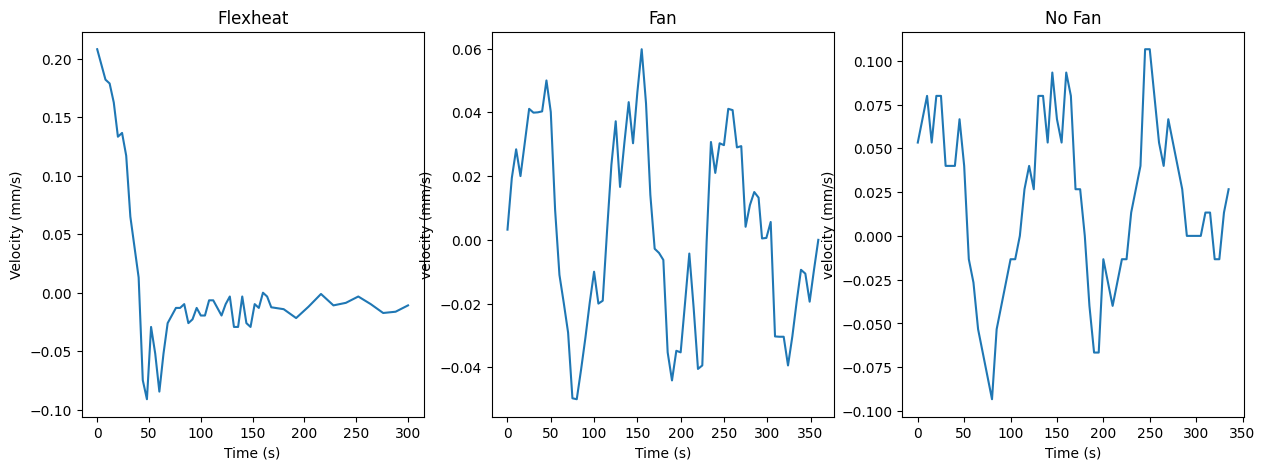

In [116]:
#take the derivative of the three graphs to get velocity in mm/s
flexheat['velocity (mm/s)'] = np.gradient(flexheat['elongation (mm)'],flexheat['time (s)'])
fan['velocity (mm/s)'] = np.gradient(fan['elongation (mm)'],fan['time (s)'])
nofan['velocity (mm/s)'] = np.gradient(nofan['elongation (mm)'],nofan['time (s)'])

#plot the three velocity graphs
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.lineplot(x='time (s)',y='velocity (mm/s)',data=flexheat,ax=ax[0])
sns.lineplot(x='time (s)',y='velocity (mm/s)',data=fan,ax=ax[1])
sns.lineplot(x='time (s)',y='velocity (mm/s)',data=nofan,ax=ax[2])
ax[0].set_title('Flexheat')
ax[1].set_title('Fan')
ax[2].set_title('No Fan')
ax[0].set_ylabel('Velocity (mm/s)')
ax[0].set_xlabel('Time (s)')
ax[1].set_xlabel('Time (s)')
ax[2].set_xlabel('Time (s)')
plt.show()


In [117]:
#mass 
m = 9.53; #grams

#calculate mechanical power with P = Fv and convert from g to kg
F = m*9.81/1000; #N
#print force
print('Force (N):',F)
flexheat['mechanical power (W)'] = F*flexheat['velocity (mm/s)']
fan['mechanical power (W)'] = F*fan['velocity (mm/s)']
nofan['mechanical power (W)'] = F*nofan['velocity (mm/s)']

Force (N): 0.0934893


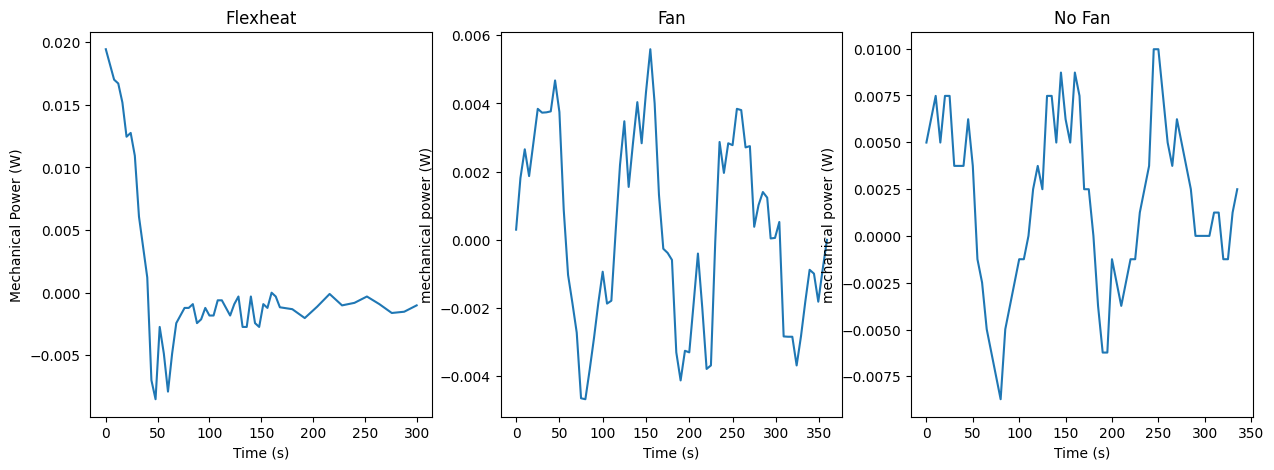

In [118]:
#plot the three mechanical power graphs
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.lineplot(x='time (s)',y='mechanical power (W)',data=flexheat,ax=ax[0])
sns.lineplot(x='time (s)',y='mechanical power (W)',data=fan,ax=ax[1])
sns.lineplot(x='time (s)',y='mechanical power (W)',data=nofan,ax=ax[2])
ax[0].set_title('Flexheat')
ax[1].set_title('Fan')
ax[2].set_title('No Fan')
ax[0].set_ylabel('Mechanical Power (W)')
ax[0].set_xlabel('Time (s)')
ax[1].set_xlabel('Time (s)')
ax[2].set_xlabel('Time (s)')
plt.show()

In [119]:
#integrate the power to get energy for all three graphs
flexheat['energy (J)'] = np.trapz(flexheat['mechanical power (W)'],flexheat['time (s)'])
fan['energy (J)'] = np.trapz(fan['mechanical power (W)'],fan['time (s)'])
nofan['energy (J)'] = np.trapz(nofan['mechanical power (W)'],nofan['time (s)'])


In [120]:
#print the energy for all three graphs
print('Flexheat energy (J):',flexheat['energy (J)'].iloc[-1])
print('Fan energy (J):',fan['energy (J)'].iloc[-1])
print('No Fan energy (J):',nofan['energy (J)'].iloc[-1])

Flexheat energy (J): 0.06481924800000013
Fan energy (J): 0.08905323271500015
No Fan energy (J): 0.5855256600697677


In [121]:
print(nofan['energy (J)'])

0     0.585526
1     0.585526
2     0.585526
3     0.585526
4     0.585526
        ...   
63    0.585526
64    0.585526
65    0.585526
66    0.585526
67    0.585526
Name: energy (J), Length: 68, dtype: float64


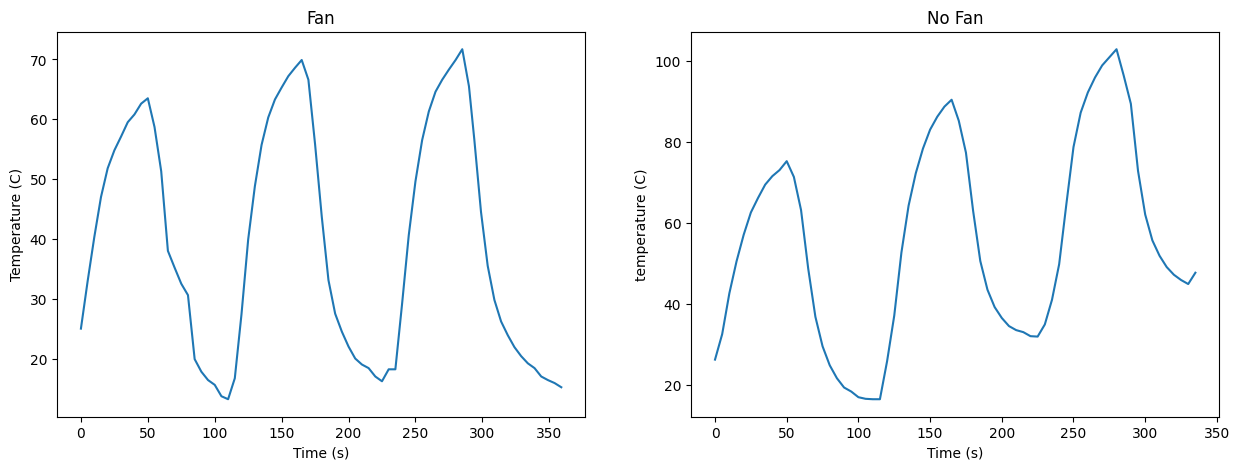

In [122]:
#plot temperatures for fan and nofan
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.lineplot(x='time (s)',y='temperature (C)',data=fan,ax=ax[0])
sns.lineplot(x='time (s)',y='temperature (C)',data=nofan,ax=ax[1])
ax[0].set_title('Fan')
ax[1].set_title('No Fan')
ax[0].set_ylabel('Temperature (C)')
ax[0].set_xlabel('Time (s)')
ax[1].set_xlabel('Time (s)')
plt.show()